In [1]:
%matplotlib inline
import torch
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython import display

Generate dataset.

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
epsilon = torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
labels += epsilon

print(features[0], labels[0])

tensor([1.5263, 0.7739]) tensor(4.6339)


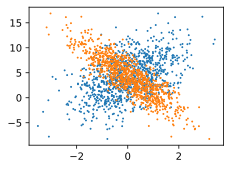

In [3]:
import sys
sys.path.append('..')
import d2dl

d2dl.set_figsize()
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

Read datas

In [4]:
batch_size = 10

for X, y in d2dl.data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.2821,  0.2147],
        [ 0.5965,  1.0050],
        [-1.5947, -0.6066],
        [-0.8781,  0.9364],
        [ 0.2464,  0.7307],
        [ 1.8256,  1.4421],
        [-0.4140, -0.6323],
        [ 0.9034, -0.3947],
        [ 1.5851, -2.2223],
        [-0.2962, -0.4199]]) tensor([ 2.9035,  1.9763,  3.0726, -0.7524,  2.2008,  2.9418,  5.5283,  7.3637,
        14.9177,  5.0120])


Initialize

In [5]:
W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

Train

In [6]:
lr = 0.03
num_epochs = 3
net = d2dl.linreg
loss = d2dl.square_loss

for epoch in range(num_epochs):
    for X, y in d2dl.data_iter(batch_size, features, labels):
        l = loss(net(X, W, b), y).sum()
        l.backward()
        d2dl.sgd([W, b], lr, batch_size)
        
        W.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, W, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.043504
epoch 2, loss 0.000173
epoch 3, loss 0.000051


In [7]:
print(true_w, '\n', W)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9995],
        [-3.3994]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)
